## Data Exploring with pandas

In the previous session, we prepared our version of the [MovieLens](https://grouplens.org/datasets/movielens/) data set. The data now includes movie ratings, movie metadata, and demographic data about the users.

It is time to start exploring the data. We will do it in *goal-oriented* manner: by trying to find the right questions and then looking for answers to those questions.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

<h3>Load and Summarize Dataset</h3>

Now it is time to load the file into a DataFrame and to take a quick look at the data.

In [4]:
df = pd.read_csv('movie_lens_1M.csv')

In [5]:
# Use pd.to_datetime to convert values in 'timestamp' column into datetime objects.
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [6]:
# This title is too long, let's shorten it.
df['title'] = df['title'].replace(
    'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)', 
    'Seven Samurai (Shichinin no samurai) (1954)'
)

In [7]:
df.shape

(973178, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973178 entries, 0 to 973177
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     973178 non-null  int64         
 1   movie_id    973178 non-null  int64         
 2   rating      973178 non-null  int64         
 3   timestamp   973178 non-null  datetime64[ns]
 4   gender      973178 non-null  object        
 5   age         973178 non-null  object        
 6   occupation  973178 non-null  object        
 7   zip         973178 non-null  int64         
 8   title       973178 non-null  object        
 9   genres      973178 non-null  object        
 10  state       973178 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 81.7+ MB


In [9]:
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
0,1,1193,5,2000-12-31 22:12:40,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),drama,MI
1,1,661,3,2000-12-31 22:35:09,F,Under 18,K-12 student,48067,James and the Giant Peach (1996),animation|children's|musical,MI
2,1,914,3,2000-12-31 22:32:48,F,Under 18,K-12 student,48067,My Fair Lady (1964),musical|romance,MI
3,1,3408,4,2000-12-31 22:04:35,F,Under 18,K-12 student,48067,Erin Brockovich (2000),drama,MI
4,1,2355,5,2001-01-06 23:38:11,F,Under 18,K-12 student,48067,"Bug's Life, A (1998)",animation|children's|comedy,MI


In [10]:
df.head().T

,0,1,2,3,4
user_id,1,1,1,1,1
movie_id,1193,661,914,3408,2355
rating,5,3,3,4,5
timestamp,2000-12-31 22:12:40,2000-12-31 22:35:09,2000-12-31 22:32:48,2000-12-31 22:04:35,2001-01-06 23:38:11
gender,F,F,F,F,F
age,Under 18,Under 18,Under 18,Under 18,Under 18
occupation,K-12 student,K-12 student,K-12 student,K-12 student,K-12 student
zip,48067,48067,48067,48067,48067
title,One Flew Over the Cuckoo's Nest (1975),James and the Giant Peach (1996),My Fair Lady (1964),Erin Brockovich (2000),"Bug's Life, A (1998)"
genres,drama,animation|children's|musical,musical|romance,drama,animation|children's|comedy


In [11]:
df.sample(n=3)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
621857,3841,95,4,2000-08-11 14:12:26,M,45-49,tradesman/craftsman,26101,Broken Arrow (1996),action|thriller,WV
524958,3311,44,4,2000-09-03 04:36:22,M,25-34,college/grad student,90039,Mortal Kombat (1995),action|adventure,CA
519804,3283,2094,3,2000-09-05 02:57:37,M,35-44,self-employed,66208,"Rocketeer, The (1991)",action|adventure|sci-fi,KS


In [12]:
df.tail(2)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
973176,6040,1096,4,2000-04-26 02:20:48,M,25-34,doctor/health care,11106,Sophie's Choice (1982),drama,NY
973177,6040,1097,4,2000-04-26 02:19:29,M,25-34,doctor/health care,11106,E.T. the Extra-Terrestrial (1982),children's|drama|fantasy|sci-fi,NY


We are ready to start asking questions...

<mark>**Q1** What are minimum, maximum, mean, and median rating?</mark>

In [13]:
df['rating'].describe()

count   973,178.00
mean          3.58
std           1.11
min           1.00
25%           3.00
50%           4.00
75%           4.00
max           5.00
Name: rating, dtype: float64

In [14]:
df['rating'].min()

1

In [15]:
df['rating'].max()

5

In [16]:
df['rating'].mean()

3.5835551153026475

In [17]:
df['rating'].median()

4.0

<h3>GroupBy Mechanics</h3>

By "group by" we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

See more info in pandas documentation: [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [18]:
grouped = df.groupby('title')

In [19]:
movie_name, movie_data = None, None

for name, group_data in grouped:
    print("name: %s" % name)
    print("group shape: %s" % str(group_data.shape))
    movie_name = name
    movie_data = group_data
    break

name: $1,000,000 Duck (1971)
group shape: (36, 11)


In [20]:
movie_name

'$1,000,000 Duck (1971)'

In [21]:
movie_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
31301,216,2031,2,2000-12-15 08:00:30,M,45-49,retired,52761,"$1,000,000 Duck (1971)",children's|comedy,IA
71155,494,2031,5,2000-12-07 19:00:51,F,35-44,other,17870,"$1,000,000 Duck (1971)",children's|comedy,PA
106124,714,2031,4,2000-12-02 18:45:11,M,18-24,college/grad student,76013,"$1,000,000 Duck (1971)",children's|comedy,TX
131229,869,2031,1,2001-09-01 20:36:59,M,18-24,writer,92026,"$1,000,000 Duck (1971)",children's|comedy,CA
158459,1034,2031,3,2000-11-24 19:15:19,F,35-44,academic/educator,82601,"$1,000,000 Duck (1971)",children's|comedy,WY
...,...,...,...,...,...,...,...,...,...,...,...
777051,4784,2031,4,2000-09-26 20:26:33,F,35-44,doctor/health care,48105,"$1,000,000 Duck (1971)",children's|comedy,MI
837752,5179,2031,1,2000-06-24 00:41:04,M,25-34,programmer,94110,"$1,000,000 Duck (1971)",children's|comedy,CA
838901,5185,2031,3,2000-07-08 14:57:41,F,35-44,college/grad student,44485,"$1,000,000 Duck (1971)",children's|comedy,OH
910197,5643,2031,2,2001-03-10 05:04:52,F,35-44,academic/educator,84108,"$1,000,000 Duck (1971)",children's|comedy,UT


In [22]:
movie_data['title'].count()

36

In [23]:
gr = df.groupby('title')
gr.get_group("$1,000,000 Duck (1971)").head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
31301,216,2031,2,2000-12-15 08:00:30,M,45-49,retired,52761,"$1,000,000 Duck (1971)",children's|comedy,IA
71155,494,2031,5,2000-12-07 19:00:51,F,35-44,other,17870,"$1,000,000 Duck (1971)",children's|comedy,PA
106124,714,2031,4,2000-12-02 18:45:11,M,18-24,college/grad student,76013,"$1,000,000 Duck (1971)",children's|comedy,TX
131229,869,2031,1,2001-09-01 20:36:59,M,18-24,writer,92026,"$1,000,000 Duck (1971)",children's|comedy,CA
158459,1034,2031,3,2000-11-24 19:15:19,F,35-44,academic/educator,82601,"$1,000,000 Duck (1971)",children's|comedy,WY


In [24]:
df_duck = gr.get_group("$1,000,000 Duck (1971)")

In [25]:
df_duck

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
31301,216,2031,2,2000-12-15 08:00:30,M,45-49,retired,52761,"$1,000,000 Duck (1971)",children's|comedy,IA
71155,494,2031,5,2000-12-07 19:00:51,F,35-44,other,17870,"$1,000,000 Duck (1971)",children's|comedy,PA
106124,714,2031,4,2000-12-02 18:45:11,M,18-24,college/grad student,76013,"$1,000,000 Duck (1971)",children's|comedy,TX
131229,869,2031,1,2001-09-01 20:36:59,M,18-24,writer,92026,"$1,000,000 Duck (1971)",children's|comedy,CA
158459,1034,2031,3,2000-11-24 19:15:19,F,35-44,academic/educator,82601,"$1,000,000 Duck (1971)",children's|comedy,WY
...,...,...,...,...,...,...,...,...,...,...,...
777051,4784,2031,4,2000-09-26 20:26:33,F,35-44,doctor/health care,48105,"$1,000,000 Duck (1971)",children's|comedy,MI
837752,5179,2031,1,2000-06-24 00:41:04,M,25-34,programmer,94110,"$1,000,000 Duck (1971)",children's|comedy,CA
838901,5185,2031,3,2000-07-08 14:57:41,F,35-44,college/grad student,44485,"$1,000,000 Duck (1971)",children's|comedy,OH
910197,5643,2031,2,2001-03-10 05:04:52,F,35-44,academic/educator,84108,"$1,000,000 Duck (1971)",children's|comedy,UT


Let us group the data by `title` column and save the number of ratings for each move into `ratings_by_title` object.

In [26]:
ratings_by_title = df.groupby('title').size()

In [27]:
type(ratings_by_title)

pandas.core.series.Series

### Series

The data structure Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the *index*.

Read more: [Data Structures: Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)

In [28]:
ratings_by_title

title
$1,000,000 Duck (1971)                         36
'Night Mother (1986)                           68
'Til There Was You (1997)                      50
'burbs, The (1989)                            295
...And Justice for All (1979)                 189
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            293
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        21
eXistenZ (1999)                               397
Length: 3703, dtype: int64

<mark>**Q2** How many times were movies rated on average?</mark>

In [29]:
ratings_by_title.describe()

count   3,703.00
mean      262.81
std       374.82
min         1.00
25%        32.00
50%       120.00
75%       340.50
max     3,346.00
dtype: float64

In [30]:
ratings_by_title.mean()

262.80799351876857

In [31]:
ratings_by_title.quantile(q=0.67)

239.34000000000015

In [32]:
ratings_by_title.quantile(q=0.50) == ratings_by_title.median()

True

<mark>**Q3** Which are Top 10 most rated movies? (Note: not best rated!)</mark>

In [33]:
ratings_by_title.sort_values(ascending=False).head(10)

title
American Beauty (1999)                                   3346
Star Wars: Episode V - The Empire Strikes Back (1980)    2918
Star Wars: Episode IV - A New Hope (1977)                2915
Star Wars: Episode VI - Return of the Jedi (1983)        2811
Terminator 2: Judgment Day (1991)                        2593
Jurassic Park (1993)                                     2593
Saving Private Ryan (1998)                               2591
Matrix, The (1999)                                       2525
Back to the Future (1985)                                2516
Silence of the Lambs, The (1991)                         2514
dtype: int64

In [34]:
ratings_by_title.sort_values(ascending=False).head(10).index

Index(['American Beauty (1999)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Terminator 2: Judgment Day (1991)', 'Jurassic Park (1993)',
       'Saving Private Ryan (1998)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)'],
      dtype='object', name='title')

In [35]:
ratings_by_title.sort_values(ascending=False).head(10).index.to_list()

['American Beauty (1999)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Terminator 2: Judgment Day (1991)',
 'Jurassic Park (1993)',
 'Saving Private Ryan (1998)',
 'Matrix, The (1999)',
 'Back to the Future (1985)',
 'Silence of the Lambs, The (1991)']

### Indexing

We are now going to save the titles of all movies that were rated at least 250 times as `index`. Later we will be able to use this index to enable a quick access to movie titles.

Read more: [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [36]:
ratings_by_title.index

Index(['$1,000,000 Duck (1971)', ''Night Mother (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       '...And Justice for All (1979)', '1-900 (1994)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)', '12 Angry Men (1957)',
       ...
       'Young Poisoner's Handbook, The (1995)', 'Young Sherlock Holmes (1985)',
       'Young and Innocent (1937)', 'Your Friends and Neighbors (1998)',
       'Zachariah (1971)', 'Zed & Two Noughts, A (1985)', 'Zero Effect (1998)',
       'Zero Kelvin (Kjærlighetens kjøtere) (1995)', 'Zeus and Roxanne (1997)',
       'eXistenZ (1999)'],
      dtype='object', name='title', length=3703)

In [37]:
ratings_by_title >= 250

title
$1,000,000 Duck (1971)                        False
'Night Mother (1986)                          False
'Til There Was You (1997)                     False
'burbs, The (1989)                             True
...And Justice for All (1979)                 False
                                              ...  
Zed & Two Noughts, A (1985)                   False
Zero Effect (1998)                             True
Zero Kelvin (Kjærlighetens kjøtere) (1995)    False
Zeus and Roxanne (1997)                       False
eXistenZ (1999)                                True
Length: 3703, dtype: bool

In [38]:
ratings_by_title.index[ratings_by_title >= 250]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1191)

In [39]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [40]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [41]:
active_titles[8]

'2001: A Space Odyssey (1968)'

<h3>Pivot Tables</h3>

A pivot table is a data summarization tool frequently found in spreadsheet programs and other analysis software. It aggregates a table of data by one or more keys, arranging the data in rectangle with some of the group keys along the rows and some along the columns.

Read more: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)

![Pivot](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)

<mark>**Q4** What are Top 10 (best rated) movies according to females?</mark>

In [42]:
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
0,1,1193,5,2000-12-31 22:12:40,F,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),drama,MI
1,1,661,3,2000-12-31 22:35:09,F,Under 18,K-12 student,48067,James and the Giant Peach (1996),animation|children's|musical,MI
2,1,914,3,2000-12-31 22:32:48,F,Under 18,K-12 student,48067,My Fair Lady (1964),musical|romance,MI
3,1,3408,4,2000-12-31 22:04:35,F,Under 18,K-12 student,48067,Erin Brockovich (2000),drama,MI
4,1,2355,5,2001-01-06 23:38:11,F,Under 18,K-12 student,48067,"Bug's Life, A (1998)",animation|children's|comedy,MI


In [43]:
mean_ratings = df.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [44]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.40,2.76
'Night Mother (1986),3.39,3.25
'Til There Was You (1997),2.69,2.73
"'burbs, The (1989)",2.79,2.96
...And Justice for All (1979),3.82,3.69


We are interested only in active titles.

In [45]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1191)

In [46]:
mean_ratings = mean_ratings.loc[active_titles]

In [47]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.79,2.96
10 Things I Hate About You (1999),3.67,3.31
101 Dalmatians (1961),3.81,3.49
101 Dalmatians (1996),3.27,2.90
12 Angry Men (1957),4.21,4.32


In [48]:
mean_ratings['F'].sort_values(ascending=False).head(10)

title
Close Shave, A (1995)                                    4.66
Wrong Trousers, The (1993)                               4.59
Schindler's List (1993)                                  4.57
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)            4.56
Wallace & Gromit: The Best of Aardman Animation (1996)   4.56
Grand Day Out, A (1992)                                  4.56
To Kill a Mockingbird (1962)                             4.54
Shawshank Redemption, The (1994)                         4.53
Usual Suspects, The (1995)                               4.52
Creature Comforts (1990)                                 4.51
Name: F, dtype: float64

In [49]:
mean_ratings['F'].sort_values(ascending=False).head(10).index.to_list()

['Close Shave, A (1995)',
 'Wrong Trousers, The (1993)',
 "Schindler's List (1993)",
 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Grand Day Out, A (1992)',
 'To Kill a Mockingbird (1962)',
 'Shawshank Redemption, The (1994)',
 'Usual Suspects, The (1995)',
 'Creature Comforts (1990)']

In [50]:
top_female_ratings = mean_ratings['F'].sort_values(ascending=False)

In [51]:
top_female_ratings[:10]

title
Close Shave, A (1995)                                    4.66
Wrong Trousers, The (1993)                               4.59
Schindler's List (1993)                                  4.57
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)            4.56
Wallace & Gromit: The Best of Aardman Animation (1996)   4.56
Grand Day Out, A (1992)                                  4.56
To Kill a Mockingbird (1962)                             4.54
Shawshank Redemption, The (1994)                         4.53
Usual Suspects, The (1995)                               4.52
Creature Comforts (1990)                                 4.51
Name: F, dtype: float64

<mark>**Q5** What are Top 10 (best rated) movies according to males?</mark>

In [52]:
top_male_ratings = mean_ratings['M'].sort_values(ascending=False)

In [53]:
top_male_ratings.head(10)

title
Godfather, The (1972)                         4.58
Seven Samurai (Shichinin no samurai) (1954)   4.57
Shawshank Redemption, The (1994)              4.56
Raiders of the Lost Ark (1981)                4.52
Usual Suspects, The (1995)                    4.51
Schindler's List (1993)                       4.49
Star Wars: Episode IV - A New Hope (1977)     4.49
Wrong Trousers, The (1993)                    4.48
Close Shave, A (1995)                         4.48
Double Indemnity (1944)                       4.47
Name: M, dtype: float64

In [54]:
top_male_ratings.head(10).index.to_list()

['Godfather, The (1972)',
 'Seven Samurai (Shichinin no samurai) (1954)',
 'Shawshank Redemption, The (1994)',
 'Raiders of the Lost Ark (1981)',
 'Usual Suspects, The (1995)',
 "Schindler's List (1993)",
 'Star Wars: Episode IV - A New Hope (1977)',
 'Wrong Trousers, The (1993)',
 'Close Shave, A (1995)',
 'Double Indemnity (1944)']

<h3>Cross Tabulations: Crosstab</h3>

A cross-tabulation is a special case of a pivot table that computes group frequencies.

Use the crosstab function to compute a cross-tabulation of two (or more) factors. By default crosstab computes a frequency table of the factors unless an array of values and an aggregation function are passed.

Read more: [Cross tabulations](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#cross-tabulations)

In [55]:
pd.crosstab(df.gender, df.age)

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
gender,,,,,,,
F,43485,90013,48168,23699,17992,8773,8246
M,135791,296524,144718,57120,52306,28382,17961


<mark>**Q6** Which age groups are best represented?</mark>

*Visualize results in order to obtain a clear answer.*

In [56]:
# Add subtotals.
pd.crosstab(df.gender, df.age, margins=True)

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18,All
gender,,,,,,,,
F,43485,90013,48168,23699,17992,8773,8246,240376
M,135791,296524,144718,57120,52306,28382,17961,732802
All,179276,386537,192886,80819,70298,37155,26207,973178


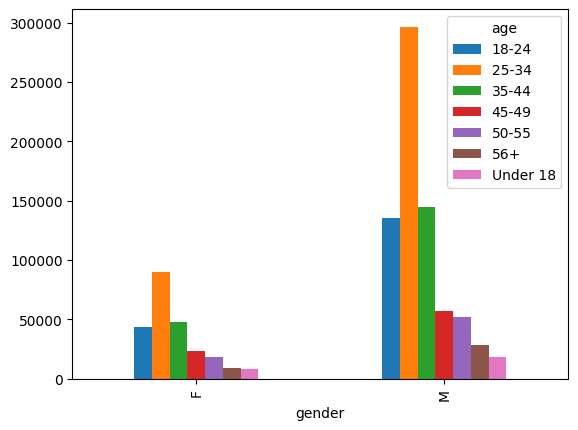

In [57]:
pd.crosstab(df.gender, df.age).plot(kind='bar');

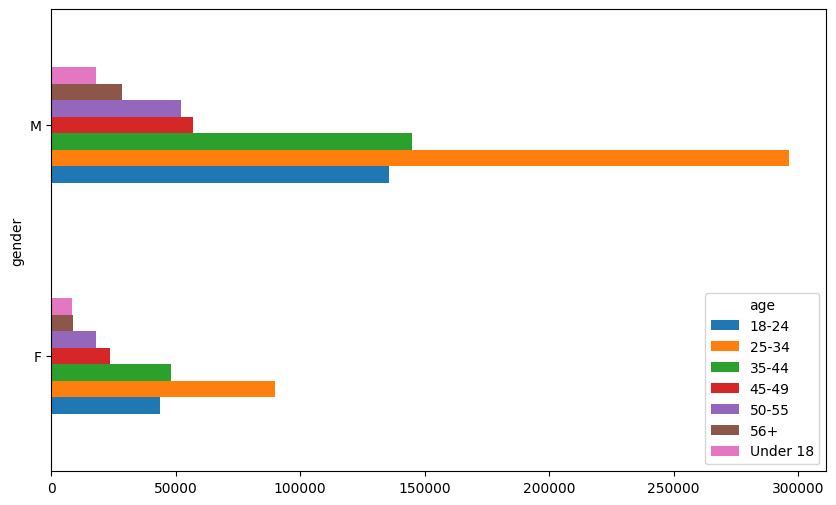

In [58]:
# It is always a good idea to visualize data when possible.
pd.crosstab(df.gender, df.age).plot(kind='barh', figsize=(10,6));

<mark>**Q7** Which occupations are best represented?</mark>

*Visualize results in order to obtain a clear answer.*

In [59]:
pd.set_option('display.max_rows', 23)

In [60]:
movies_crosstab = pd.crosstab([df.gender, df.age], df.occupation, margins=True).T

In [61]:
movies_crosstab

gender                    F                                             \
age                   18-24  25-34  35-44  45-49  50-55   56+ Under 18   
occupation                                                               
K-12 student            168      0      0      0      0     0     6304   
academic/educator      3240  13013   6221   5754   2747  1180      297   
artist                 3544   5301   2861   1828   1326   865      176   
clerical/admin         1029   7621   3229    855    677   708        0   
college/grad student  22059   8057   1038    132    399     0        0   
customer service        161   1388   1844    350    162     0        0   
doctor/health care      210   4867   2991   2749   3215   506        0   
executive/managerial    612   9241   4161   1807   1615   421       74   
farmer                    0      0     74      0    510    52        0   
homemaker               924   2588   4956   1034    683   369        0   
lawyer                   56   1194    922     89    320    62        0   
other                  4180  13702   6283   3260   2249  1034     1196   
programmer              651   2660   1628    560    531   347        0   
retired                   0      0      0    152    543  1905        0   
sales/marketing        2022   7064   1709    547    253   394        0   
scientist               462   2536    406    606      0   188        0   
self-employed           402   1258   2783   1515    806   675        0   
technician/engineer    1111   3141   2137   1177     83     0        0   
tradesman/craftsman       0    142      0      0    272     0        0   
unemployed             1202   1045   1027      0      0     0      199   
writer                 1452   5195   3898   1284   1601    67        0   
All                   43485  90013  48168  23699  17992  8773     8246   

gender                     M                                                \
age                    18-24   25-34   35-44  45-49  50-55    56+ Under 18   
occupation                                                                   
K-12 student            2695      50     302      0      0    204    12560   
academic/educator       3730   19688   11115   6772   5339   4011      300   
artist                  4512   18024    6130   2409   1308    407       92   
clerical/admin          2173    6927    3948   2078   1222    716        0   
college/grad student   64937   30180    2086    118     43      0      221   
customer service        2366    9265    2699   1732    515     22        0   
doctor/health care      1807    8049    5353   2171   3168    781        0   
executive/managerial    3107   33841   27515   9225   7799   3145      210   
farmer                    28     647     102      0     59     29        0   
homemaker                 51     132     608      0      0      0        0   
lawyer                  1222    7116    3835   2780   2162    217       30   
other                  12928   46274   16974   4728   8786   1741     2578   
programmer              7623   24221   10506   3800   2245    757      446   
retired                    0       0     748   1009   2576   6552       23   
sales/marketing         5677   16873    8682   2070   1394   1971      146   
scientist               1944    9984    4196    792    920    619        0   
self-employed           2608   11205   10784   4232   5772   2721        0   
technician/engineer     6384   27546   16418   7077   4169   2746       59   
tradesman/craftsman     1897    3761    2670   2045    654    309        0   
unemployed              3285    3806     633    460    347     88     1296   
writer                  6817   18935    9414   3622   3828   1346        0   
All                   135791  296524  144718  57120  52306  28382    17961   

gender                   All  
age                           
occupation                    
K-12 student           22283  
academic/educator      83407  
artist                 48783  
clerical/adm

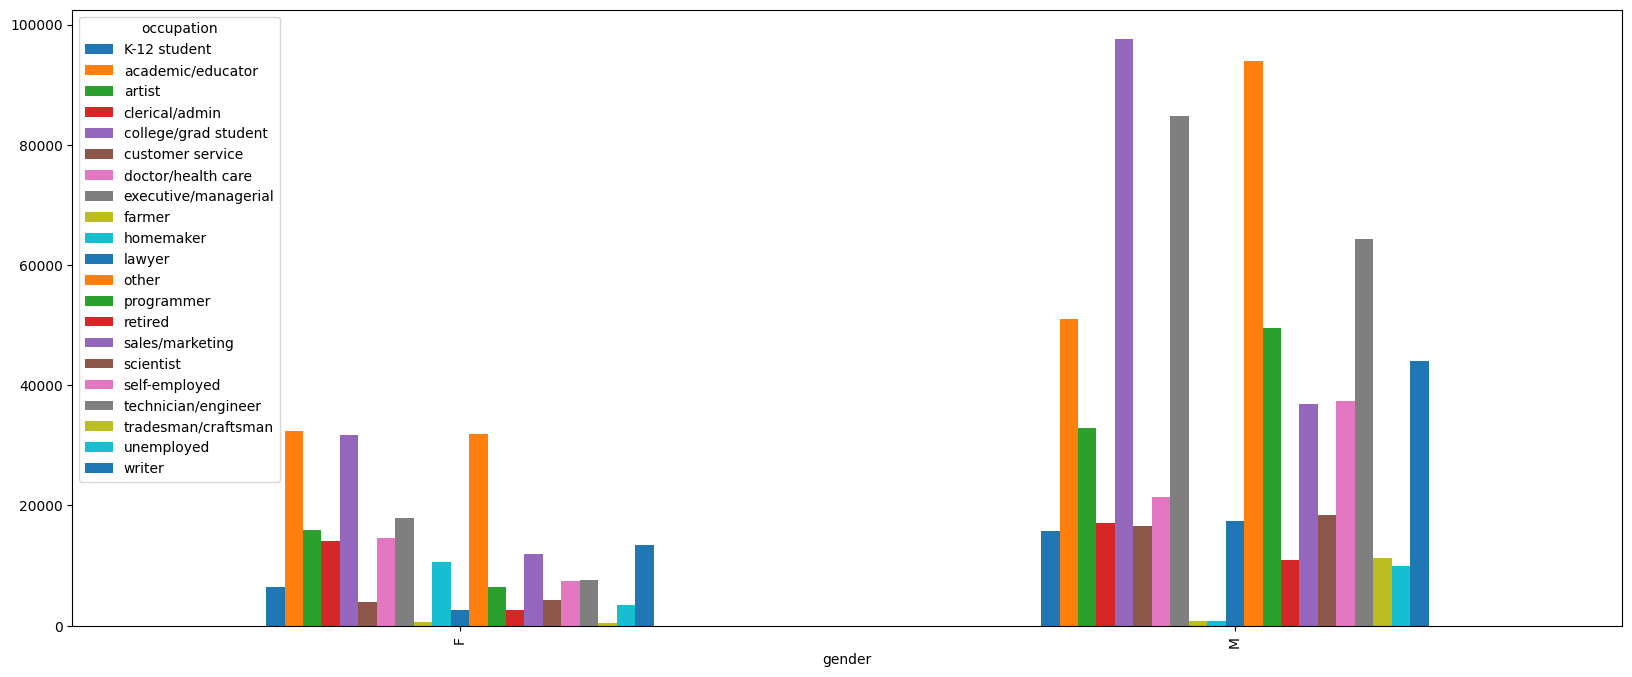

In [62]:
pd.crosstab(df.gender, df.occupation).plot(kind='bar', figsize=(20,8));

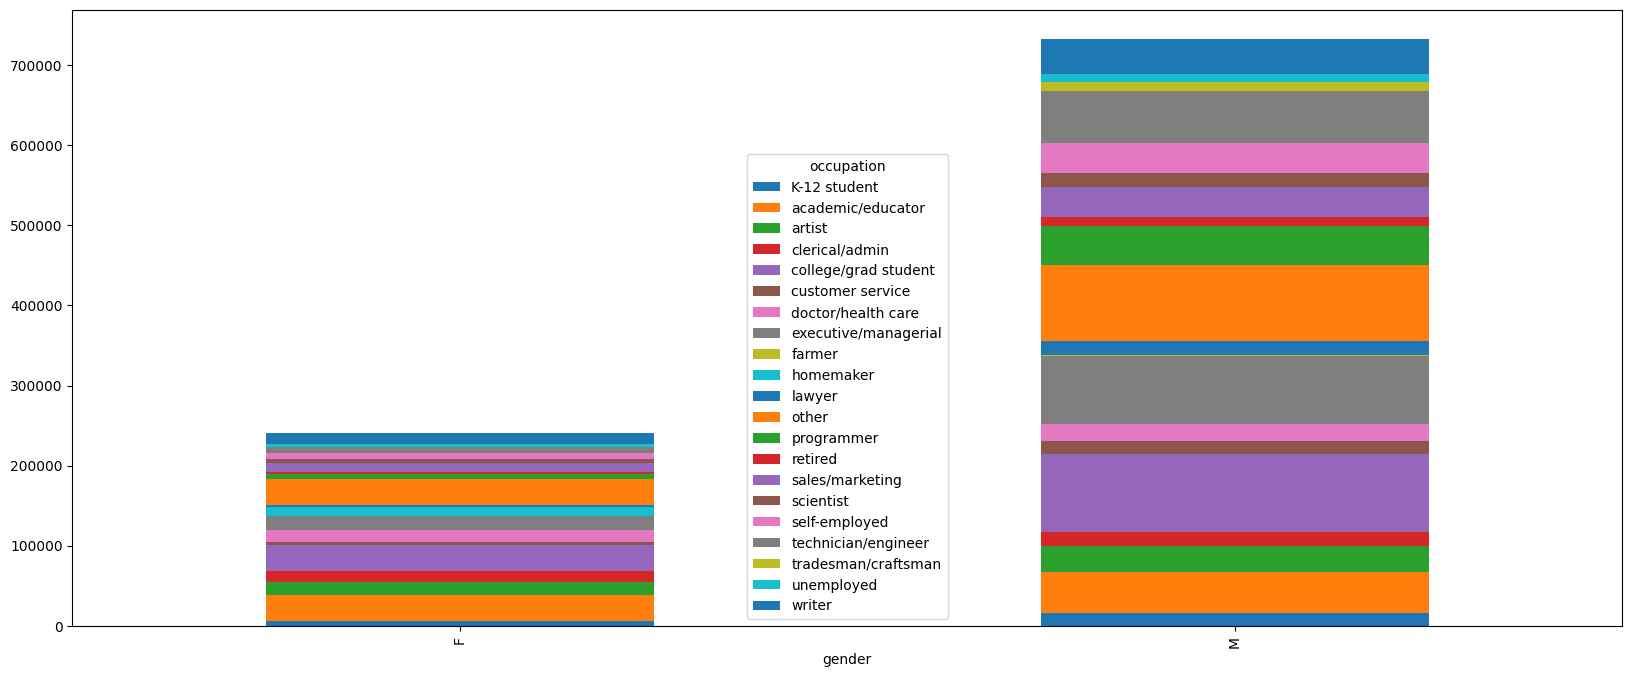

In [63]:
pd.crosstab(df.gender, df.occupation).plot(kind='bar', stacked=True, figsize=(20,8));

### Stacking and Unstacking

Closely related to the pivot function are the related stack and unstack functions. These functions are designed to work together with MultiIndex objects. Here are essentially what these functions do:

The clearest way to explain is by example.

Read more: [Reshaping by stacking and unstacking](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-stacking-and-unstacking)

In [64]:
# The data structure of movies_crosstab is actually DataFrame...
type(movies_crosstab)

pandas.core.frame.DataFrame

In [65]:
# However, not an ordinary one...
movies_crosstab.columns

MultiIndex([(  'F',    '18-24'),
            (  'F',    '25-34'),
            (  'F',    '35-44'),
            (  'F',    '45-49'),
            (  'F',    '50-55'),
            (  'F',      '56+'),
            (  'F', 'Under 18'),
            (  'M',    '18-24'),
            (  'M',    '25-34'),
            (  'M',    '35-44'),
            (  'M',    '45-49'),
            (  'M',    '50-55'),
            (  'M',      '56+'),
            (  'M', 'Under 18'),
            ('All',         '')],
           names=['gender', 'age'])

In [66]:
# Create a subset in order to easier deal with the data.
movies_crosstab_education = pd.crosstab([df.gender, df.age], df.occupation[df.occupation == 'academic/educator']).T
movies_crosstab_education

gender                F                                             M         \
age               18-24  25-34 35-44 45-49 50-55   56+ Under 18 18-24  25-34   
occupation                                                                     
academic/educator  3240  13013  6221  5754  2747  1180      297  3730  19688   

gender                                               
age                35-44 45-49 50-55   56+ Under 18  
occupation                                           
academic/educator  11115  6772  5339  4011      300

![Stack](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_stack.png)

#### Stack

"Pivot" a level of the column labels, returning a DataFrame with an index with a new inner-most level of row labels.


In [67]:
stacked = movies_crosstab_education.stack(future_stack=True)
stacked

gender                          F      M
occupation        age                   
academic/educator 18-24      3240   3730
                  25-34     13013  19688
                  35-44      6221  11115
                  45-49      5754   6772
                  50-55      2747   5339
                  56+        1180   4011
                  Under 18    297    300

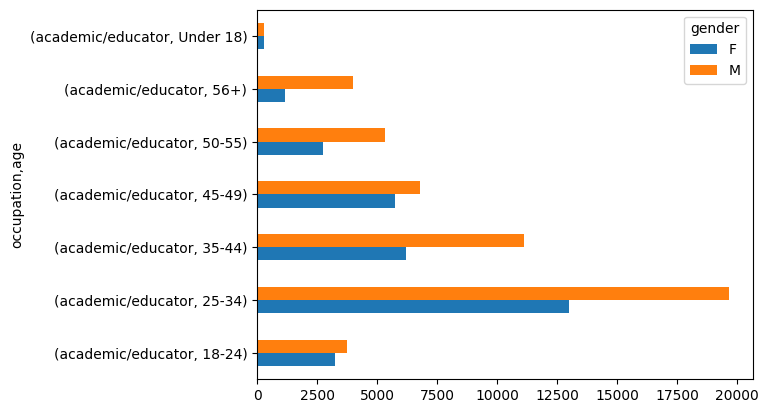

In [68]:
stacked.plot(kind='barh');

![Unstack](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_unstack.png)

#### Unstack

Inverse operation from stack: "pivot" a level of the row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.

In [69]:
# the same as before stacking
stacked.unstack()

gender                F                                             M         \
age               18-24  25-34 35-44 45-49 50-55   56+ Under 18 18-24  25-34   
occupation                                                                     
academic/educator  3240  13013  6221  5754  2747  1180      297  3730  19688   

gender                                               
age                35-44 45-49 50-55   56+ Under 18  
occupation                                           
academic/educator  11115  6772  5339  4011      300

<mark>**Q8** What are Top 10 (best rated) movies according to the age group 18-24?</mark>

In [70]:
mean_ratings = df.pivot_table('rating', index='title', columns='age', aggfunc='mean')

In [71]:
mean_ratings.head()

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
title,,,,,,,
"$1,000,000 Duck (1971)",3.00,3.09,3.14,2.00,2.75,NaN,NaN
'Night Mother (1986),4.67,3.42,2.90,3.60,3.38,4.33,2.00
'Til There Was You (1997),2.57,2.67,2.89,2.33,2.50,2.67,3.50
"'burbs, The (1989)",3.27,2.64,2.83,2.55,3.23,2.20,4.50
...And Justice for All (1979),3.43,3.70,3.67,4.10,3.54,3.93,3.00


In [72]:
mean_ratings = mean_ratings.loc[active_titles]

In [73]:
mean_ratings[:5]

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
title,,,,,,,
"'burbs, The (1989)",3.27,2.64,2.83,2.55,3.23,2.20,4.50
10 Things I Hate About You (1999),3.42,3.44,3.12,3.23,3.63,4.00,3.79
101 Dalmatians (1961),3.29,3.62,3.86,3.95,3.66,3.15,3.50
101 Dalmatians (1996),2.49,2.94,3.27,3.48,3.43,3.50,3.15
12 Angry Men (1957),4.05,4.40,4.37,4.26,4.29,4.22,4.25


In [74]:
top_age_group_ratings = mean_ratings.sort_values(by='18-24', ascending=False)
top_age_group_ratings[:10]

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
title,,,,,,,
"Usual Suspects, The (1995)",4.68,4.55,4.39,4.24,4.34,4.44,4.42
"Shawshank Redemption, The (1994)",4.67,4.59,4.49,4.48,4.35,4.41,4.52
Seven Samurai (Shichinin no samurai) (1954),4.60,4.55,4.53,4.53,4.65,4.50,4.50
"Close Shave, A (1995)",4.58,4.55,4.47,4.59,4.59,4.45,4.31
Life Is Beautiful (La Vita è bella) (1997),4.55,4.38,4.20,4.00,4.17,4.23,4.32
"Wrong Trousers, The (1993)",4.53,4.51,4.44,4.63,4.65,4.71,4.32
American Beauty (1999),4.52,4.33,4.24,4.14,4.15,4.11,4.44
Charade (1963),4.52,4.05,4.25,4.20,4.13,4.13,4.67
"Godfather, The (1972)",4.50,4.57,4.54,4.37,4.54,4.46,4.48


In [75]:
mean_ratings.sort_values(by='18-24', ascending=False)[:10].index.tolist()

['Usual Suspects, The (1995)',
 'Shawshank Redemption, The (1994)',
 'Seven Samurai (Shichinin no samurai) (1954)',
 'Close Shave, A (1995)',
 'Life Is Beautiful (La Vita è bella) (1997)',
 'Wrong Trousers, The (1993)',
 'American Beauty (1999)',
 'Charade (1963)',
 'Godfather, The (1972)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)']

<mark>**Q9** What are Top 10 (best rated) movies according to females in age group 18-24?</mark><br>

In [76]:
mean_ratings = df.pivot_table('rating', index='title', columns=['age', 'gender'], aggfunc='mean')
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:5]

age                               18-24      25-34      35-44      45-49       \
gender                                F    M     F    M     F    M     F    M   
title                                                                           
'burbs, The (1989)                 3.11 3.34  2.47 2.71  3.06 2.73  2.00 2.75   
10 Things I Hate About You (1999)  3.51 3.38  3.73 3.30  3.47 3.00  3.64 3.00   
101 Dalmatians (1961)              3.43 3.21  3.76 3.57  4.05 3.75  4.31 3.79   
101 Dalmatians (1996)              2.71 2.38  3.15 2.77  3.22 3.32  3.78 3.33   
12 Angry Men (1957)                3.71 4.15  4.51 4.38  4.22 4.41  4.38 4.23   

age                               50-55       56+      Under 18       
gender                                F    M    F    M        F    M  
title                                                                 
'burbs, The (1989)                 3.14 3.27 1.00 2.50      NaN 4.50  
10 Things I Hate About You (1999)  3.55 3.69 4.00 4.00     4.15 3.44  
101 Dalmatians (1961)              4.12 3.32 3.67 3.06     3.81 3.22  
101 Dalmatians (1996)              4.25 3.00 3.67 3.40     3.62 2.71  
12 Angry Men (1957)                4.39 4.24 4.00 4.28     3.67 5.00

In [77]:
top_young_female_ratings = mean_ratings['18-24'].sort_values(by='F', ascending=False)
top_young_female_ratings[:10]

gender,F,M
title,,
Breaker Morant (1980),5.00,4.00
My Favorite Year (1982),5.00,4.00
"Hidden, The (1987)",5.00,3.57
Five Easy Pieces (1970),5.00,4.18
Stalag 17 (1953),5.00,4.15
Kelly's Heroes (1970),5.00,3.88
It Happened One Night (1934),4.88,4.19
Brazil (1985),4.75,4.31
"Wrong Trousers, The (1993)",4.73,4.45


In [78]:
mean_ratings['18-24'].sort_values(by='F', ascending=False)[:10].index.tolist()

['Breaker Morant (1980)',
 'My Favorite Year (1982)',
 'Hidden, The (1987)',
 'Five Easy Pieces (1970)',
 'Stalag 17 (1953)',
 "Kelly's Heroes (1970)",
 'It Happened One Night (1934)',
 'Brazil (1985)',
 'Wrong Trousers, The (1993)',
 'Charade (1963)']

<mark>**Q10** What are Top 10 (best rated) movies according to males in age group 25-34?</mark>

In [79]:
mean_ratings

age                               18-24      25-34      35-44      45-49       \
gender                                F    M     F    M     F    M     F    M   
title                                                                           
'burbs, The (1989)                 3.11 3.34  2.47 2.71  3.06 2.73  2.00 2.75   
10 Things I Hate About You (1999)  3.51 3.38  3.73 3.30  3.47 3.00  3.64 3.00   
101 Dalmatians (1961)              3.43 3.21  3.76 3.57  4.05 3.75  4.31 3.79   
101 Dalmatians (1996)              2.71 2.38  3.15 2.77  3.22 3.32  3.78 3.33   
12 Angry Men (1957)                3.71 4.15  4.51 4.38  4.22 4.41  4.38 4.23   
...                                 ...  ...   ...  ...   ...  ...   ...  ...   
Young Guns (1988)                  3.21 3.71  3.42 3.42  3.27 3.29  3.57 3.04   
Young Guns II (1990)               3.07 3.11  2.79 2.90  3.00 2.81  3.25 2.21   
Young Sherlock Holmes (1985)       3.60 3.60  3.69 3.38  3.08 3.27  3.14 3.09   
Zero Effect (1998)                 4.14 3.87  3.89 3.67  3.67 3.62  4.00 3.67   
eXistenZ (1999)                    2.92 3.43  3.25 3.21  2.85 3.48  3.67 3.05   

age                               50-55       56+      Under 18       
gender                                F    M    F    M        F    M  
title                                                                 
'burbs, The (1989)                 3.14 3.27 1.00 2.50      NaN 4.50  
10 Things I Hate About You (1999)  3.55 3.69 4.00 4.00     4.15 3.44  
101 Dalmatians (1961)              4.12 3.32 3.67 3.06     3.81 3.22  
101 Dalmatians (1996)              4.25 3.00 3.67 3.40     3.62 2.71  
12 Angry Men (1957)                4.39 4.24 4.00 4.28     3.67 5.00  
...                                 ...  ...  ...  ...      ...  ...  
Young Guns (1988)                   NaN 3.19 3.00 3.00      NaN 3.00  
Young Guns II (1990)               1.00 2.50  NaN 2.71     5.00 3.00  
Young Sherlock Holmes (1985)       3.20 3.33 4.00 3.14      NaN 3.00  
Zero Effect (1998)                 4.33 3.73 3.50 3.67     4.50 4.00  
eXistenZ (1999)                    3.50 3.25  NaN 2.20     4.00 3.08  

[1191 rows x 14 columns]

In [80]:
top_young_male_ratings = mean_ratings['25-34'].sort_values(by='M', ascending=False)
top_young_male_ratings[:10]

gender,F,M
title,,
Raiders of the Lost Ark (1981),4.42,4.62
Star Wars: Episode IV - A New Hope (1977),4.43,4.62
"Godfather, The (1972)",4.40,4.61
"Shawshank Redemption, The (1994)",4.61,4.58
"Usual Suspects, The (1995)",4.50,4.56
Seven Samurai (Shichinin no samurai) (1954),4.50,4.55
Rear Window (1954),4.50,4.53
Double Indemnity (1944),4.34,4.50
"Godfather: Part II, The (1974)",4.16,4.49


In [81]:
mean_ratings['25-34'].sort_values(by='M', ascending=False)[:10].index.tolist()

['Raiders of the Lost Ark (1981)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Godfather, The (1972)',
 'Shawshank Redemption, The (1994)',
 'Usual Suspects, The (1995)',
 'Seven Samurai (Shichinin no samurai) (1954)',
 'Rear Window (1954)',
 'Double Indemnity (1944)',
 'Godfather: Part II, The (1974)',
 "Schindler's List (1993)"]

<mark>**Q11** How many people have rated the movie called "Ferris Bueller's Day Off (1986)"?</mark>

In [82]:
# Let's view the first five rows that contain ratings for that movie.
df[df['title'] == "Ferris Bueller's Day Off (1986)"].head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
13,1,2918,4,2000-12-31 22:35:24,F,Under 18,K-12 student,48067,Ferris Bueller's Day Off (1986),comedy,MI
1026,10,2918,5,2000-12-31 01:25:22,F,35-44,academic/educator,95370,Ferris Bueller's Day Off (1986),comedy,CA
1272,11,2918,5,2001-01-07 21:32:09,F,25-34,academic/educator,4093,Ferris Bueller's Day Off (1986),comedy,ME
2402,19,2918,4,2001-02-14 22:42:43,M,Under 18,K-12 student,48073,Ferris Bueller's Day Off (1986),comedy,MI
2707,22,2918,4,2000-12-30 00:09:37,M,18-24,scientist,53706,Ferris Bueller's Day Off (1986),comedy,WI


In [83]:
df[df['title'] == "Ferris Bueller's Day Off (1986)"].shape

(1439, 11)

In [84]:
# This is one way toobtain the answer...
df[df['title'] == "Ferris Bueller's Day Off (1986)"].shape[0]

1439

In [85]:
# However, there is more than one way...
gr = df.groupby('title')
gr.get_group("Ferris Bueller's Day Off (1986)").head(3)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,state
13,1,2918,4,2000-12-31 22:35:24,F,Under 18,K-12 student,48067,Ferris Bueller's Day Off (1986),comedy,MI
1026,10,2918,5,2000-12-31 01:25:22,F,35-44,academic/educator,95370,Ferris Bueller's Day Off (1986),comedy,CA
1272,11,2918,5,2001-01-07 21:32:09,F,25-34,academic/educator,4093,Ferris Bueller's Day Off (1986),comedy,ME


In [86]:
gr.get_group("Ferris Bueller's Day Off (1986)").count()

user_id       1439
movie_id      1439
rating        1439
timestamp     1439
gender        1439
age           1439
occupation    1439
zip           1439
title         1439
genres        1439
state         1439
dtype: int64

In [87]:
gr.get_group("Ferris Bueller's Day Off (1986)")['rating'].count()

1439

In [88]:
len(gr.get_group("Ferris Bueller's Day Off (1986)"))

1439

<mark>**Q12** What are Top 10 movies where the ratings of female and male users differ the most?</mark>

In [89]:
mean_ratings = df.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.79,2.96
10 Things I Hate About You (1999),3.67,3.31
101 Dalmatians (1961),3.81,3.49
101 Dalmatians (1996),3.27,2.90
12 Angry Men (1957),4.21,4.32


In [90]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [91]:
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.79,2.96,0.17
10 Things I Hate About You (1999),3.67,3.31,-0.36
101 Dalmatians (1961),3.81,3.49,-0.32
101 Dalmatians (1996),3.27,2.90,-0.36
12 Angry Men (1957),4.21,4.32,0.11
...,...,...,...
Young Guns (1988),3.36,3.42,0.06
Young Guns II (1990),2.93,2.89,-0.04
Young Sherlock Holmes (1985),3.48,3.35,-0.14


In [92]:
# male users prefer these titles
sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=False)
sorted_by_diff[:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.50,4.22,0.72
"Kentucky Fried Movie, The (1977)",2.87,3.57,0.69
Dumb & Dumber (1994),2.70,3.35,0.65
"Cable Guy, The (1996)",2.25,2.87,0.62
"Hidden, The (1987)",3.14,3.75,0.61
"Longest Day, The (1962)",3.41,4.02,0.61
Evil Dead II (Dead By Dawn) (1987),3.31,3.92,0.61
Caddyshack (1980),3.40,3.98,0.58
Rocky III (1982),2.39,2.94,0.55


In [93]:
# female users prefer these titles
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.80,2.96,-0.84
Jumpin' Jack Flash (1986),3.26,2.59,-0.67
Grease (1978),3.98,3.35,-0.63
Steel Magnolias (1989),3.91,3.36,-0.55
Little Women (1994),3.87,3.33,-0.54
Anastasia (1997),3.83,3.28,-0.54
Iron Eagle (1986),3.07,2.54,-0.53
"Rocky Horror Picture Show, The (1975)",3.67,3.15,-0.53
"Color Purple, The (1985)",4.16,3.65,-0.52


In [94]:
mean_ratings['abs_diff'] = mean_ratings['diff'].abs()

In [95]:
mean_ratings

gender,F,M,diff,abs_diff
title,,,,
"'burbs, The (1989)",2.79,2.96,0.17,0.17
10 Things I Hate About You (1999),3.67,3.31,-0.36,0.36
101 Dalmatians (1961),3.81,3.49,-0.32,0.32
101 Dalmatians (1996),3.27,2.90,-0.36,0.36
12 Angry Men (1957),4.21,4.32,0.11,0.11
...,...,...,...,...
Young Guns (1988),3.36,3.42,0.06,0.06
Young Guns II (1990),2.93,2.89,-0.04,0.04
Young Sherlock Holmes (1985),3.48,3.35,-0.14,0.14


In [96]:
sorted_by_abs_diff = mean_ratings.sort_values(by='abs_diff', ascending=False)
sorted_by_abs_diff[:10]

gender,F,M,diff,abs_diff
title,,,,
Dirty Dancing (1987),3.80,2.96,-0.84,0.84
"Good, The Bad and The Ugly, The (1966)",3.50,4.22,0.72,0.72
"Kentucky Fried Movie, The (1977)",2.87,3.57,0.69,0.69
Jumpin' Jack Flash (1986),3.26,2.59,-0.67,0.67
Dumb & Dumber (1994),2.70,3.35,0.65,0.65
Grease (1978),3.98,3.35,-0.63,0.63
"Cable Guy, The (1996)",2.25,2.87,0.62,0.62
"Hidden, The (1987)",3.14,3.75,0.61,0.61
"Longest Day, The (1962)",3.41,4.02,0.61,0.61


<mark>**Q13** What are Top 10 movies where the ratings differ the most?</mark>

*Hint: use standard deviations.*

In [97]:
# Standard deviation of rating grouped by title
rating_std_by_title = df.groupby('title')['rating'].std()

In [98]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [99]:
rating_std_by_title

title
'burbs, The (1989)                  1.10
10 Things I Hate About You (1999)   0.99
101 Dalmatians (1961)               0.98
101 Dalmatians (1996)               1.10
12 Angry Men (1957)                 0.81
                                    ... 
Young Guns (1988)                   1.02
Young Guns II (1990)                1.07
Young Sherlock Holmes (1985)        0.89
Zero Effect (1998)                  1.03
eXistenZ (1999)                     1.17
Name: rating, Length: 1191, dtype: float64

In [100]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Blair Witch Project, The (1999)         1.32
Dumb & Dumber (1994)                    1.32
Natural Born Killers (1994)             1.31
Tank Girl (1995)                        1.27
Rocky Horror Picture Show, The (1975)   1.26
Eyes Wide Shut (1999)                   1.26
Bicentennial Man (1999)                 1.26
Evita (1996)                            1.25
Fear and Loathing in Las Vegas (1998)   1.25
Billy Madison (1995)                    1.25
Name: rating, dtype: float64

In [101]:
df.groupby('title')['rating'].std().loc[active_titles].sort_values(ascending=False)[:10].index.tolist()

['Blair Witch Project, The (1999)',
 'Dumb & Dumber (1994)',
 'Natural Born Killers (1994)',
 'Tank Girl (1995)',
 'Rocky Horror Picture Show, The (1975)',
 'Eyes Wide Shut (1999)',
 'Bicentennial Man (1999)',
 'Evita (1996)',
 'Fear and Loathing in Las Vegas (1998)',
 'Billy Madison (1995)']

<mark>**Q14** What are Top 10 states where the most user votes came from?</mark>

In [102]:
# How many states are represented in the data?
df['state'].nunique()

51

In [103]:
gr = df.groupby('state')
votes_by_states = gr.size()

In [104]:
type(votes_by_states)

pandas.core.series.Series

In [105]:
votes_by_states[:5]

state
AK       911
AL      3500
AR      4496
AZ     15086
CA    180436
dtype: int64

In [106]:
top_states = votes_by_states.sort_values(ascending=False)[:10]
top_states

state
CA    180436
NY     69746
MN     63169
TX     51982
IL     51682
MA     44661
OH     39814
WA     37225
MI     36834
FL     28765
dtype: int64

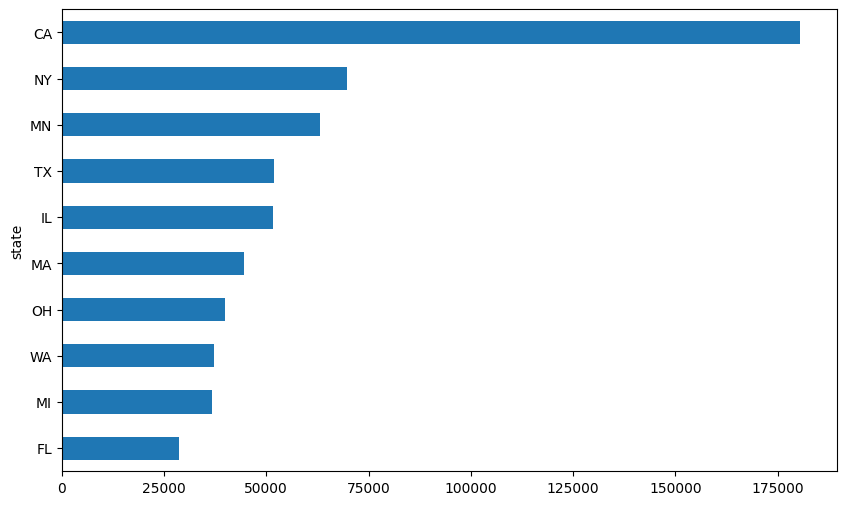

In [107]:
top_states.sort_values().plot(kind='barh', figsize=(10,6));

In [108]:
gr = df.groupby('state')
gr

In [109]:
gr.size().sort_values(ascending=False).head(10).index.tolist()

['CA', 'NY', 'MN', 'TX', 'IL', 'MA', 'OH', 'WA', 'MI', 'FL']

In [110]:
df.groupby('state').size().sort_values(ascending=False)[:10].index.tolist()

['CA', 'NY', 'MN', 'TX', 'IL', 'MA', 'OH', 'WA', 'MI', 'FL']

<mark>**Q15** What are ten most represented genres?</mark>

In [111]:
# How many different genres are there in the data?
df['genres'].nunique()

301

In [112]:
df['genres'].unique()[:10]

array(['drama', "animation|children's|musical", 'musical|romance',
       "animation|children's|comedy", 'action|adventure|comedy|romance',
       'action|adventure|drama', 'comedy|drama',
       "adventure|children's|drama|musical", 'musical', 'comedy'],
      dtype=object)

In [113]:
genres = df.groupby('genres').size()

In [114]:
genres

genres
action                                           11945
action|adventure                                 10170
action|adventure|animation                         337
action|adventure|animation|children's|fantasy      126
action|adventure|animation|horror|sci-fi           603
                                                 ...  
sci-fi|thriller|war                                273
sci-fi|war                                        1337
thriller                                         17404
war                                                968
western                                           5542
Length: 301, dtype: int64

In [115]:
type(genres)

pandas.core.series.Series

In [116]:
genres.sort_values(ascending=False)[:10]

genres
comedy                     113635
drama                      108510
comedy|romance              41582
comedy|drama                41108
drama|romance               28461
action|thriller             26109
horror                      21944
drama|thriller              17787
thriller                    17404
action|adventure|sci-fi     17264
dtype: int64

In [117]:
df.groupby('genres').size().sort_values(ascending=False)[:10].index.tolist()

['comedy',
 'drama',
 'comedy|romance',
 'comedy|drama',
 'drama|romance',
 'action|thriller',
 'horror',
 'drama|thriller',
 'thriller',
 'action|adventure|sci-fi']